In [5]:
import time

In [6]:
from gdx import gdx

In [7]:
gdx = gdx.gdx()

In [8]:
gdx.open(connection='usb')

Visualizzo le informazioni relative alla periferica collegata attualmente

In [9]:
def getDeviceInfo():
    for myinfo in gdx.device_info():
        print(myinfo)

        
    

In [10]:
getDeviceInfo()

GDX-FOR 07500289
Go Direct® Force and Acceleration Sensor
0
Charging



Visualizzo la lista dei sensori della periferica

In [11]:
def getSensorInfo():
    for myinfo in gdx.sensor_info():
        print(myinfo)

In [12]:
getSensorInfo()

[1, 'Force', 'N', []]
[2, 'X-axis acceleration', 'm/s²', []]
[3, 'Y-axis acceleration', 'm/s²', []]
[4, 'Z-axis acceleration', 'm/s²', []]
[5, 'X-axis gyro', 'rad/s', []]
[6, 'Y-axis gyro', 'rad/s', []]
[7, 'Z-axis gyro', 'rad/s', []]


Seleziono uno o più sensori, per selezionarne altri è sufficiente fornire in input una lista con l'indice del sensore es [1,4,7], la variabile column_headers referenzia le unità del sensore scelto

In [13]:
gdx.select_sensors([7])


In [14]:
column_headers = gdx.enabled_sensor_info() 

La funzione getUnits estrae le unità di misura dalla lista delle informazioni dei sensori

In [15]:
def getUnits(info_headers):
    unit_list = []
    units = ''
    for headers in info_headers:
        units = str(headers[headers.find('(') : headers.find(')') +1])
        unit_list.append(units)
    return unit_list

In [31]:
units=getUnits(column_headers)

In [ ]:
gdx.start(300)

In [ ]:
print(gdx.read())

In [ ]:
gdx.stop()

In [17]:
import matplotlib.pyplot as plt 

%matplotlib widget
plt.rcParams['animation.html']='jshtml'

In [18]:
def getData(samples,delta_t):
        
        gdx.start(delta_t)
        times=[]
        data=[]
        time=0.0
        
        for i in range(1,samples):
            measurement=gdx.read()
            times.append(time)
            time+=delta_t*0.001
            data.append(measurement[0])
            plt.plot(times,data,'-o',color='gray',markerfacecolor='red')
            fig.canvas.draw()
        gdx.stop()

In [19]:
def getData2(samples,delta_t):
        
        gdx.start(delta_t)
        times=[]
        data=[]
        time=0.0
        
        for i in range(1,samples):
            measurement=gdx.read()
            times.append(time)
            time+=delta_t*0.001
            data.append(measurement[0])
        gdx.stop()
        return times,data

In [34]:
def new_figure(data_units):
    fig=plt.figure(figsize=[10,10])
    plt.grid()
    plt.xlabel('(s)')
    plt.ylabel(data_units[0])
    #plt.rcParams['figure.dpi'] = 150
    return fig

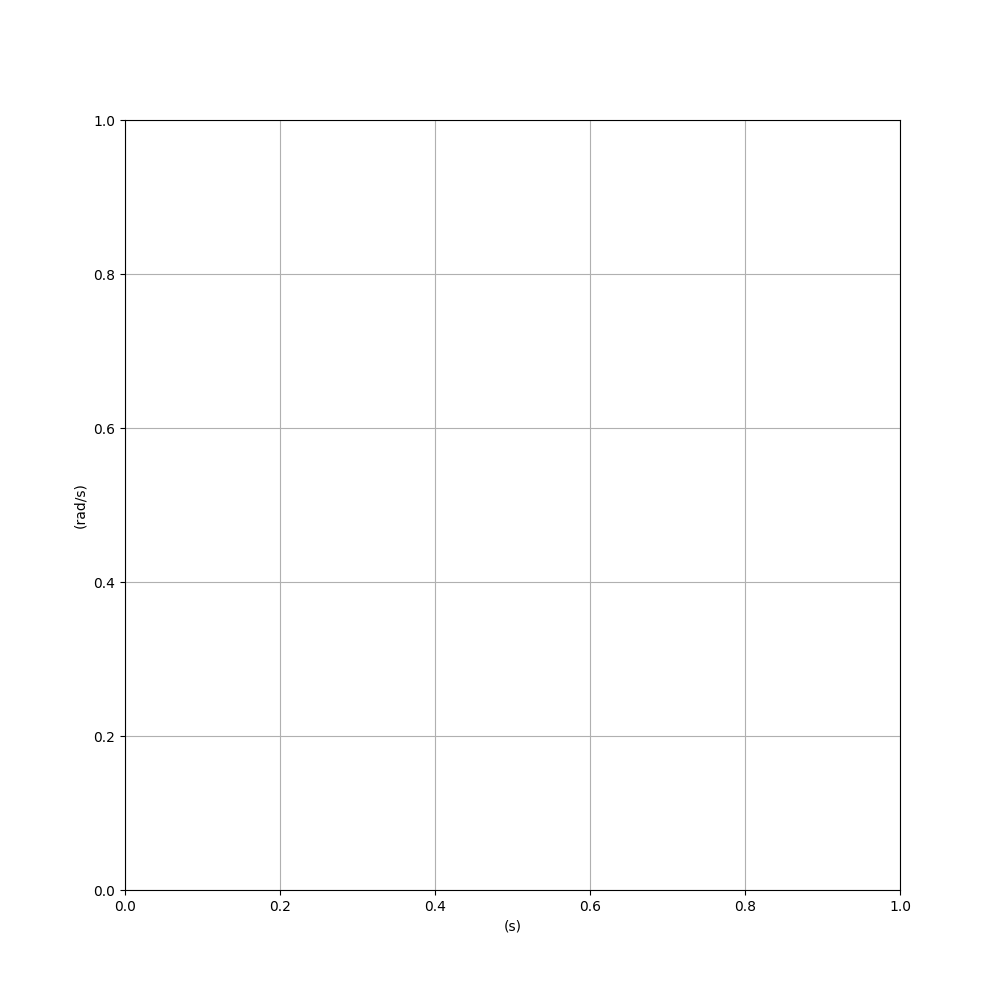

In [35]:
fig=new_figure(units)

In [ ]:
getData(1500,100)

In [27]:
m_times,m_data=getData2(3000,10)

In [36]:
plt.plot(m_times,m_data,'-o',color='gray',markerfacecolor='red')
fig.canvas.draw()